In [1]:
! pip3 install pycaret

     |████████████████████████████████| 319 kB 5.4 MB/s 
     |████████████████████████████████| 261 kB 47.6 MB/s 
     |████████████████████████████████| 2.0 MB 36.2 MB/s 
     |████████████████████████████████| 1.3 MB 34.5 MB/s 
     |████████████████████████████████| 1.7 MB 40.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 3.3 MB/s 
     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 114 kB 31.1 MB/s 
     |████████████████████████████████| 16.5 MB 31.0 MB/s 
     |████████████████████████████████| 167 kB 43.6 MB/s 
     |████████████████████████████████| 6.8 MB 27.9 MB/s 
     |████████████████████████████████| 636 kB 51.9 MB/s 
     |████████████████████████████████| 102 kB 10.7 MB/s 
     |████████████████████████████████| 303 kB 58.0 MB/s 
     |█████████████████

In [2]:
from pycaret.anomaly import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Batch 25-2022/Project Batch-25/Executives/parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
voice=pd.DataFrame(df[["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","status"]])
voice1=pd.DataFrame(df[["status"]])
amptitude=pd.DataFrame(df[["MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","status"]])
tone=pd.DataFrame(df[["NHR","HNR","status"]])
variation=pd.DataFrame(df[["spread1","spread2","PPE","RPDE","D2","DFA","status"]])
voice

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),status
0,119.992,157.302,74.997,1
1,122.400,148.650,113.819,1
2,116.682,131.111,111.555,1
3,116.676,137.871,111.366,1
4,116.014,141.781,110.655,1
5,120.552,131.162,113.787,1
6,120.267,137.244,114.820,1
7,107.332,113.840,104.315,1
8,95.730,132.068,91.754,1
9,95.056,120.103,91.226,1


In [6]:
expo_ano=setup(data=voice)

,Description,Value
0,session_id,5613
1,Original Data,"(195, 4)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(195, 5)"
9,CPU Jobs,-1


In [7]:
knn=create_model('knn')
plot_model(knn)

In [8]:
knn_prediction=predict_model(knn,data=voice)
knn_prediction

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),status,Anomaly,Anomaly_Score
0,119.992,157.302,74.997,1,0,23.564326
1,122.400,148.650,113.819,1,0,9.898228
2,116.682,131.111,111.555,1,0,3.614689
3,116.676,137.871,111.366,1,0,5.021804
4,116.014,141.781,110.655,1,0,7.484626
...,...,...,...,...,...,...
190,174.188,230.978,94.261,0,0,23.901955
191,209.516,253.017,89.488,0,0,17.746476
192,174.688,240.005,74.287,0,0,26.661431
193,198.764,396.961,74.904,0,1,72.923249


1    4
0    3
Name: status, dtype: int64

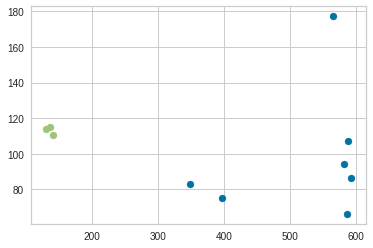

In [9]:
abn_ind=np.where(knn_prediction['Anomaly']==1)
voice2=voice.loc[abn_ind]
ind=np.where(voice2['status']==0)
plt.scatter(voice2['MDVP:Fhi(Hz)'],voice2['MDVP:Flo(Hz)'])
y=voice.values
plt.scatter(y[ind,1], y[ind,2], edgecolors="g")
voice2['status'].value_counts()

**ISOLATION FOREST USING PYCARET**

In [10]:
iforest=create_model('iforest')
plot_model(iforest)

In [11]:
iforestpred=predict_model(iforest,data=voice)
iforestpred

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),status,Anomaly,Anomaly_Score
0,119.992,157.302,74.997,1,0,-0.137302
1,122.400,148.650,113.819,1,0,-0.146078
2,116.682,131.111,111.555,1,0,-0.182401
3,116.676,137.871,111.366,1,0,-0.179574
4,116.014,141.781,110.655,1,0,-0.180476
...,...,...,...,...,...,...
190,174.188,230.978,94.261,0,0,-0.025114
191,209.516,253.017,89.488,0,0,-0.052557
192,174.688,240.005,74.287,0,1,0.005571
193,198.764,396.961,74.904,0,1,0.078828


0    7
1    3
Name: status, dtype: int64

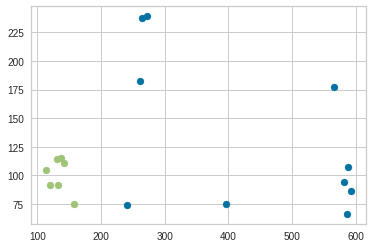

In [12]:
abn_ind=np.where(iforestpred['Anomaly']==1)
voice2=voice.loc[abn_ind]
ind=np.where(voice2['status']==0)
plt.scatter(voice2['MDVP:Fhi(Hz)'],voice2['MDVP:Flo(Hz)'])
y=voice.values
plt.scatter(y[ind,1], y[ind,2], edgecolors="g")
voice2['status'].value_counts()

*Prediction of KNN With Pycaret vs Without Pycaret* 

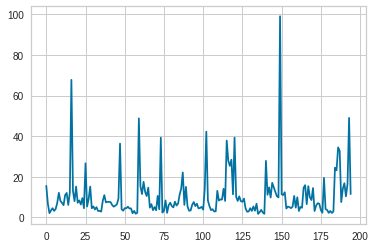

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
kn=NearestNeighbors(n_neighbors=5)
kn.fit(voice)
distance,index=kn.kneighbors(voice)
plt.plot(distance.mean(axis=1))
abn_ind=np.where(distance.mean(axis=1)<20)
voice3=voice.loc[abn_ind]
voice2=voice1.loc[abn_ind]
abn_ind=np.where(knn_prediction['Anomaly']==0)
voice4=voice.loc[abn_ind]
voice5=voice1.loc[abn_ind]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(voice3, voice2)
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)
print("\n TEST SCORE Without Pycaret [ACCURACY]: {:.2f}\n".format(kn.score(X_test, y_test)))
X_train, X_test, y_train, y_test = train_test_split(voice4, voice5)
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)
print("\n TEST SCORE With Pycaret [ACCURACY]: {:.2f}\n".format(kn.score(X_test, y_test)))



 TEST SCORE Without Pycaret [ACCURACY]: 0.80


 TEST SCORE With Pycaret [ACCURACY]: 0.87



Fitting Model

In [15]:
from sklearn.linear_model import LinearRegression

In [19]:
x=np.array(voice3["MDVP:Fhi(Hz)"]).reshape(-1,1)
y=np.array(voice3["MDVP:Flo(Hz)"])
model = LinearRegression()
model.fit(x, y)
model.score(x, y)

0.20163806063927192

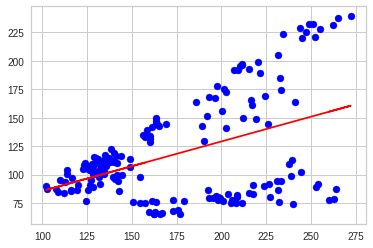

In [20]:
y_pred = model.intercept_ + model.coef_ * x
plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='red')
plt.show()